In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

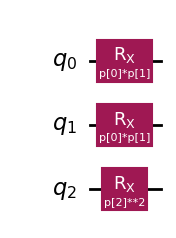

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',3)
x = ParameterVector('x',3)

qc = QuantumCircuit(3)

qc.rx(np.cos(p[0]),0)
qc.rx(np.sin(p[1]),1)
qc.rx(p[2]*p[2],2)

#qc.ry(x[0],0)
#qc.ry(x[1],1)
#qc.ry(x[2],2)

#qc.rx(np.cos(p[0]),0)
#qc.rx(np.sin(p[1]),1)
#qc.rx(2.0*p[2],2)


#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:
# from squlearn.encoding_circuit import HubregtsenEncodingCircuit
# from qiskit.circuit import ParameterVector



# pqc = HubregtsenEncodingCircuit(3,2,2)

# p = ParameterVector('p',3)
# x = ParameterVector('x',pqc.num_features)

# qc = pqc.get_circuit(p,x)
# qc.draw()

In [5]:
np.random.seed(0)
param = np.random.random(3)


#print(pqc.num_parameters)
#print(pqc.num_features)

In [6]:
from squlearn.observables import SummedPaulis

obs = SummedPaulis(3,)

obs.get_operator(ParameterVector('p',4))

SparsePauliOp(['III', 'IIZ', 'IZI', 'ZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3])])

In [7]:
from qiskit.quantum_info import SparsePauliOp

p_obs = ParameterVector('p_obs',9)

obs = SparsePauliOp('ZZZ',)

obs2= [
    SparsePauliOp('IIZ',p_obs[0])+SparsePauliOp('IZI',p_obs[1])+SparsePauliOp('ZII',p_obs[2]),
    SparsePauliOp('IIX',p_obs[3])+SparsePauliOp('IXI',p_obs[4])+SparsePauliOp('XII',p_obs[5]),
    SparsePauliOp('IIY',p_obs[6])+SparsePauliOp('IYI',p_obs[7])+SparsePauliOp('YII',p_obs[8]),
]

In [8]:
#obs2[0].parameters

In [9]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc, obs)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._free_parameters",test._free_parameters)

print("test._operators_imag",test._operators_imag)
print("test._operators_real",test._operators_real)
print("test._operators_param",test._operators_param)
print("test._operators_func",test._operators_param_func)

test._operation_list [<function qulacs_param_gate_rx at 0x000002029BEA9040>, <function qulacs_param_gate_rx at 0x000002029BEA9040>, <function qulacs_param_gate_rx at 0x000002029BEA9040>]
test._param_list []
test._qubit_list [[0], [1], [2]]
test._func_list [<function _lambdifygenerated at 0x000002029C556A60>, <function _lambdifygenerated at 0x000002029C556700>, <function _lambdifygenerated at 0x000002029C567550>]
test._func_grad_list [[<function _lambdifygenerated at 0x000002029C5621F0>, <function _lambdifygenerated at 0x000002029C562A60>], [<function _lambdifygenerated at 0x000002029C5629D0>, <function _lambdifygenerated at 0x000002029C562CA0>], [<function _lambdifygenerated at 0x000002029C567DC0>]]
test._free_parameters {ParameterVectorElement(p[1]), ParameterVectorElement(p[0]), ParameterVectorElement(p[2])}
test._operators_imag [0.0]
test._operators_real [<qulacs_core.Observable object at 0x000002029C397C70>]
test._operators_param [[]]
test._operators_func [[]]


In [10]:
test.get_circuit_func()

<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [11]:
test._qualcs_obs_parameters

[]

In [12]:
from squlearn.util.qulacs .qulacs_circuit import evaluate_circuit_gradient

evaluate_circuit_gradient(test,param)

Adding Parameterized RX gate with angle -0.39250558213041076 on qubit 0
Adding Parameterized RX gate with angle -0.39250558213041076 on qubit 1
Adding Parameterized RX gate with angle -0.363323687533286 on qubit 2
outer_jacobian [[-0.71518937  0.          0.        ]
 [ 0.         -0.5488135   0.        ]
 [ 0.          0.         -1.20552675]]
Adding Parameterized RX gate with angle -0.39250558213041076 on qubit 0
Adding Parameterized RX gate with angle -0.39250558213041076 on qubit 1
Adding Parameterized RX gate with angle -0.363323687533286 on qubit 2


array([-0.2362598 , -0.18129823, -0.36574103])

In [13]:
from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn import Executor
from squlearn.observables import CustomObservable

from squlearn.encoding_circuit import QiskitEncodingCircuit

ec = QiskitEncodingCircuit(qc)
o = CustomObservable(3,'ZZZ')

qnn = LowLevelQNNPennyLane(ec,o,Executor('pennylane'))


print(qnn.evaluate([],param,[],"f")["f"])
print(qnn.evaluate([],param,[],"dfdp")["dfdp"])

0.7979619823479727
[-0.4725196  -0.36259646 -0.36574103]
